In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy.stats import skew

In [2]:
train=pd.read_csv('C:\\Users\\PIYALI\\Downloads\\train.csv')

In [3]:
train['OverallCond'].value_counts()

5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

In [4]:
train.columns.sort_values()

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'Alley', 'BedroomAbvGr',
       'BldgType', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'CentralAir', 'Condition1', 'Condition2',
       'Electrical', 'EnclosedPorch', 'ExterCond', 'ExterQual', 'Exterior1st',
       'Exterior2nd', 'Fence', 'FireplaceQu', 'Fireplaces', 'Foundation',
       'FullBath', 'Functional', 'GarageArea', 'GarageCars', 'GarageCond',
       'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt', 'GrLivArea',
       'HalfBath', 'Heating', 'HeatingQC', 'HouseStyle', 'Id', 'KitchenAbvGr',
       'KitchenQual', 'LandContour', 'LandSlope', 'LotArea', 'LotConfig',
       'LotFrontage', 'LotShape', 'LowQualFinSF', 'MSSubClass', 'MSZoning',
       'MasVnrArea', 'MasVnrType', 'MiscFeature', 'MiscVal', 'MoSold',
       'Neighborhood', 'OpenPorchSF', 'OverallCond', 'OverallQual',
       'PavedDrive', 'PoolArea', 'Po

# DROP ID FEATURE

In [5]:
train=train.drop(columns='Id')

In [6]:
train.shape

(1460, 80)

In [7]:
all_data_na = (train.isnull().sum() / len(train)) * 100
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})

In [8]:
missing_data

,Missing Ratio
PoolQC,99.520548
MiscFeature,96.301370
Alley,93.767123
Fence,80.753425
FireplaceQu,47.260274
LotFrontage,17.739726
GarageType,5.547945
GarageYrBlt,5.547945
GarageFinish,5.547945
GarageQual,5.547945


Text(0.5, 1.0, 'Percent missing data by feature')

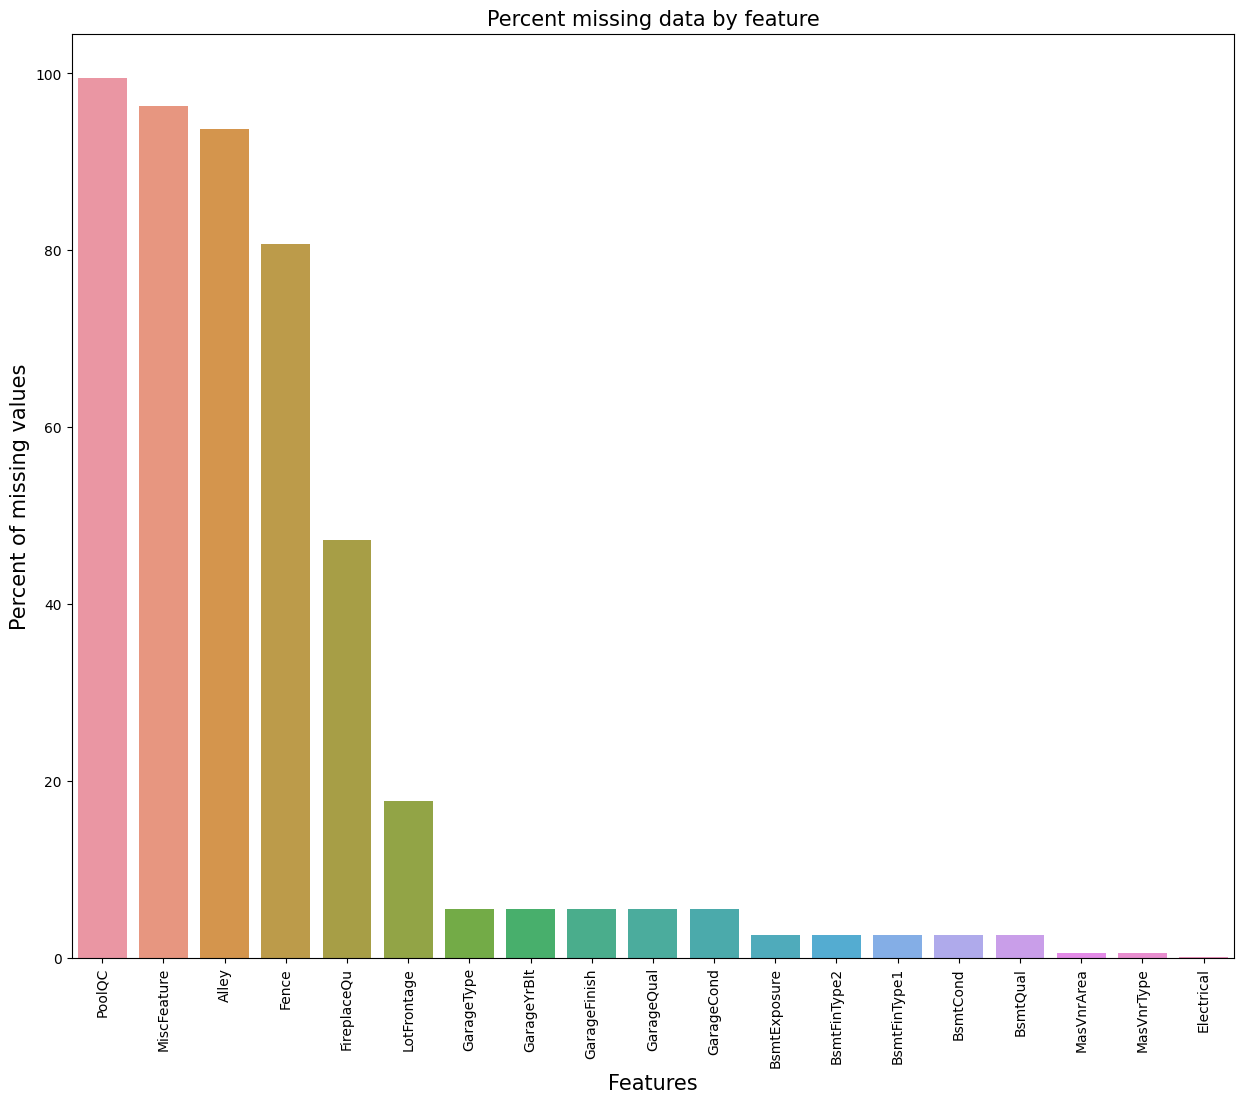

In [9]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='vertical')
sns.barplot(x=all_data_na.index, y=all_data_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

# Imputing by None for which nan means feature is absent

In [10]:
train["PoolQC"] = train["PoolQC"].fillna("None")
train["MiscFeature"] = train["MiscFeature"].fillna("None")
train["Alley"] = train["Alley"].fillna("None")
train["Fence"] = train["Fence"].fillna("None")
train["FireplaceQu"] = train["FireplaceQu"].fillna("None")

In [11]:
all_data_na = train.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37


In [12]:
train['Electrical'].value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

# MODE IMPUTATION FOR A ELECTRICAL HAS ONLY ONE MISSING VALUE

In [13]:
train['Electrical'] = train['Electrical'].fillna(train['Electrical'].mode()[0])

# Mean Value Imputation

C:\Users\PIYALI\AppData\Local\Temp\ipykernel_18020\763189829.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['MasVnrArea'].dropna(), color='blue', label='Original Data')
C:\Users\PIYALI\AppData\Local\Temp\ipykernel_18020\763189829.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fi

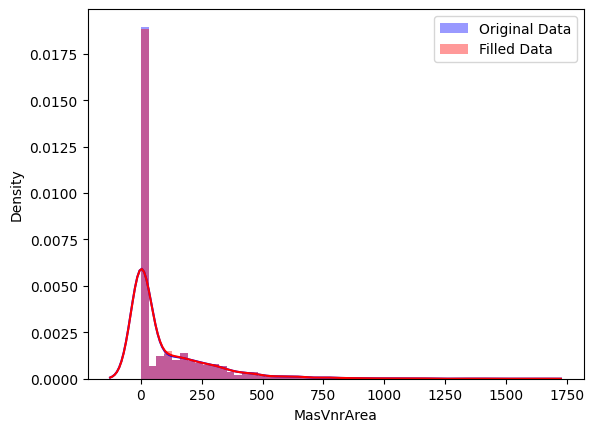

In [14]:
sns.distplot(train['MasVnrArea'].dropna(), color='blue', label='Original Data')

# Calculate the mean of the 'MasVnrArea' column
mean_value = train['MasVnrArea'].mean()

# Fill the missing values with the mean
filled_data = train['MasVnrArea'].fillna(mean_value)

# Plot the data with missing values filled
sns.distplot(filled_data, color='red', label='Filled Data')

# Add a legend
plt.legend()

# Show the plot
plt.show()

In [15]:
train['MasVnrArea'].fillna(mean_value,inplace=True)

# Mode imputation for MasVnrType having 8 missing values

In [16]:
train['MasVnrType'].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [17]:
train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])

In [18]:
all_data_na = train.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,259
GarageType,81
GarageYrBlt,81
GarageFinish,81
GarageQual,81
GarageCond,81
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37


# Garage variables
# There are 81 houses with no garages
- 81 houses has 0 garage cars as there is no garage

In [19]:
train['GarageCars'].value_counts()

2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

In [20]:
train['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [21]:
train['HasGarage'] = train['GarageType'].notna().astype(int)
train['GarageType'].fillna('NoGarage', inplace=True)
train['GarageFinish'].fillna('NoGarage', inplace=True)
train['GarageQual'].fillna('NoGarage', inplace=True)
train['GarageCond'].fillna('NoGarage', inplace=True)

## New Feature HasGarage

In [22]:
train['HasGarage'].value_counts()

1    1379
0      81
Name: HasGarage, dtype: int64

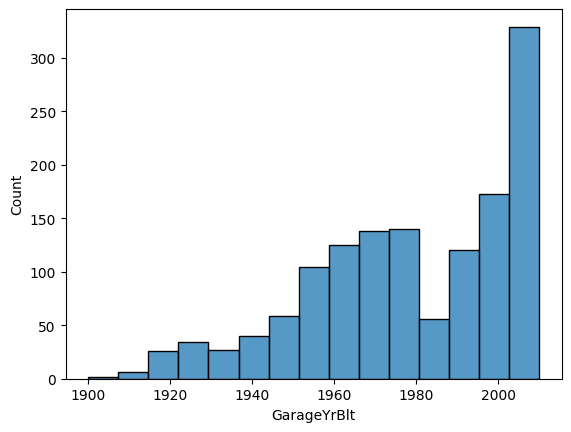

In [23]:
sns.histplot(train['GarageYrBlt'])
train['GarageYrBlt'].fillna(0,inplace=True)

In [24]:
all_data_na = train.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,259
BsmtExposure,38
BsmtFinType2,38
BsmtQual,37
BsmtCond,37
BsmtFinType1,37


# Dealing with Basement missing variables

In [25]:
train['BsmtExposure'].fillna('NoBasement',inplace=True)

In [26]:
train['BsmtFinType2'].fillna('NoBasement',inplace=True)

In [27]:
train['BsmtQual'].fillna('NoBasement',inplace=True)

In [28]:
train['BsmtFinType1'].fillna('NoBasement',inplace=True)

In [29]:
train['BsmtCond'].fillna('NoBasement',inplace=True)

In [30]:
all_data_na = train.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,259


# LotFrontage

In [31]:

from scipy.stats import chi2_contingency


# Example: Assessing MCAR for the 'LotFrontage' column
lot_frontage_missing = train['LotFrontage'].isnull()

# Example: Check if 'LotFrontage' missingness is independent of other variables
# For illustration, you might choose another categorical variable like 'Neighborhood'
neighborhood = train['Neighborhood']

# Create contingency table
contingency_table = pd.crosstab(lot_frontage_missing, neighborhood)

# Perform chi-square test
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# Print results
print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p_value}")

# Interpret results based on p-value
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: 'LotFrontage' missingness is not MCAR.")
else:
    print("Fail to reject null hypothesis: 'LotFrontage' missingness is MCAR.")


Chi-square statistic: 140.0384298016342
P-value: 2.291824345556304e-18
Reject null hypothesis: 'LotFrontage' missingness is not MCAR.


<Axes: xlabel='LotFrontage', ylabel='Density'>

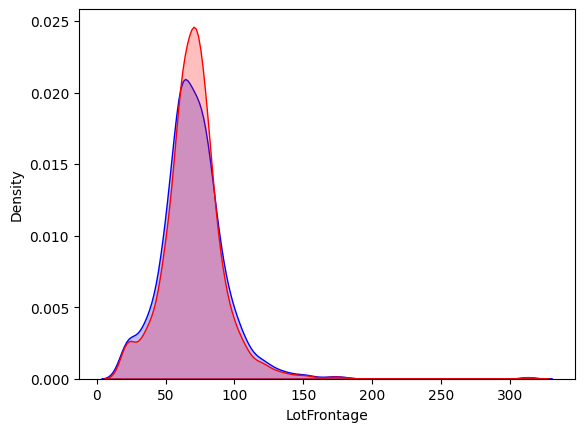

In [32]:
sns.kdeplot(train['LotFrontage'], fill=True, color='b', label='LotFrontage')
sns.kdeplot(train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median())), fill=True, color='r', label='LotFrontage_imputed')

In [33]:
all_data_na = train.isnull().sum() 
all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
missing_data

,Missing Ratio
LotFrontage,259


In [34]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor

# Assume 'train' is your DataFrame containing the dataset
# Example: train = pd.read_csv('your_dataset.csv')

# Step 1: Identify missing values in 'LotFrontage' column
lot_frontage_missing = train['LotFrontage'].isnull()

# Step 2: Initialize MICE imputer with Random Forest model
imputer = IterativeImputer(estimator=RandomForestRegressor())

# Step 3: Fit and transform the data using the imputer for 'LotFrontage' only
train_imputed = train.copy()  # Make a copy of the original data
train_imputed['LotFrontage'] = imputer.fit_transform(train_imputed[['LotFrontage']])

# Step 4: Check if all missing values in 'LotFrontage' are imputed
print("Missing values after imputation:")
print(train_imputed['LotFrontage'].isnull().sum())

# Step 5: Further analysis with the imputed dataset for 'LotFrontage'
# Now 'train_imputed' contains your dataset with imputed 'LotFrontage' values using Random Forest
# Proceed with your analysis or modeling tasks


Missing values after imputation:
0


<Axes: xlabel='LotFrontage', ylabel='Density'>

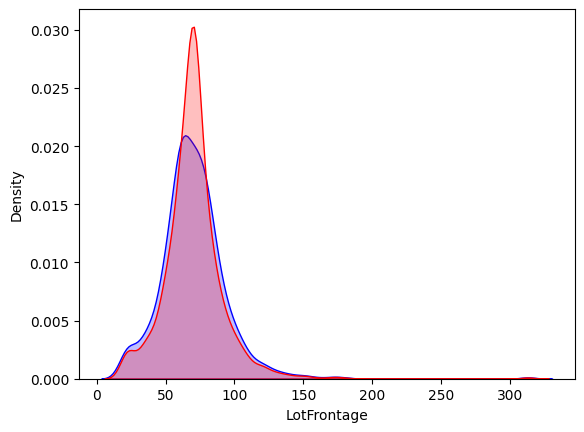

In [35]:
sns.kdeplot(train['LotFrontage'], fill=True, color='b', label='LotFrontage')
sns.kdeplot(train_imputed['LotFrontage'], fill=True, color='r', label='LotFrontage_imputed')

<Axes: xlabel='LotFrontage', ylabel='Density'>

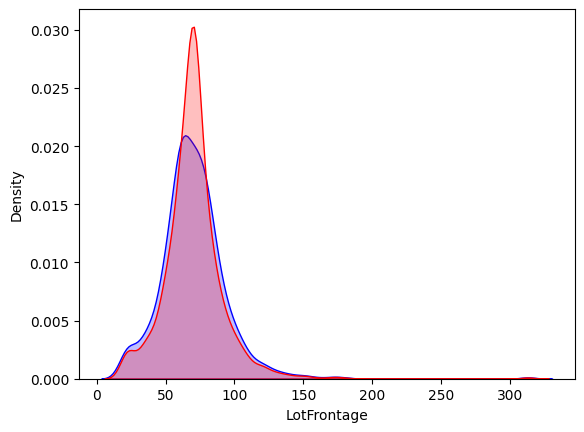

In [36]:
sns.kdeplot(train['LotFrontage'], fill=True, color='b', label='LotFrontage')
sns.kdeplot(train['LotFrontage'].fillna(train['LotFrontage'].mean()), fill=True, color='r', label='LotFrontage_imputed')

In [37]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assume 'train' is your DataFrame containing the dataset
# Example: train = pd.read_csv('your_dataset.csv')

# Step 1: Identify missing values in 'LotFrontage' column
lot_frontage_missing = train['LotFrontage'].isnull()

# Step 2: Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)  # Adjust n_neighbors as needed

# Step 3: Impute missing values in 'LotFrontage' column
train_imputed = train.copy()
train_imputed['LotFrontage'] = imputer.fit_transform(train[['LotFrontage']])

# Step 4: Check if all missing values are imputed
print("Missing values after imputation:")
print(train_imputed['LotFrontage'].isnull().sum())

# Step 5: Proceed with further analysis using the imputed dataset
# Now 'train_imputed' contains your dataset with imputed 'LotFrontage' values using KNN imputation
# Proceed with your analysis or modeling tasks


Missing values after imputation:
0


<Axes: xlabel='LotFrontage', ylabel='Density'>

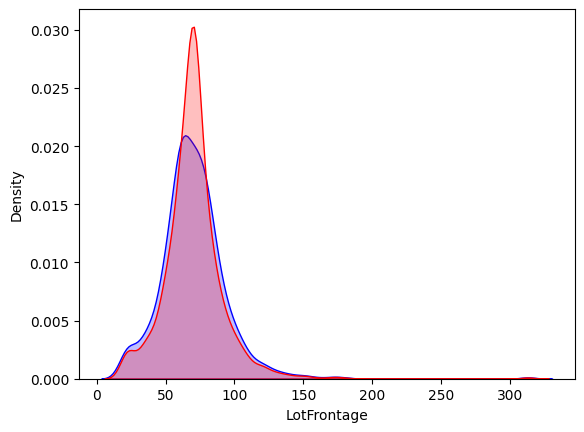

In [38]:
sns.kdeplot(train['LotFrontage'], fill=True, color='b', label='LotFrontage')
sns.kdeplot(train_imputed['LotFrontage'], fill=True, color='r', label='LotFrontage_imputed')

# BY FAR THE BEST

In [39]:
#Group by neighborhood and fill in missing value by the median LotFrontage of all the neighborhood
train['LotFrontage']=train.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [40]:
#train['LotFrontage'].fillna(train['LotFrontage'].mean(),inplace=True)

In [41]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
                  ...   
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
HasGarage          int32
Length: 81, dtype: object

In [42]:
all_data=train.drop(columns=['SalePrice','MSSubClass'])
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

train[skewed_feats] = np.log1p(train[skewed_feats])

In [43]:
skewed_feats

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal'],
      dtype='object')

In [44]:
train.to_csv('train_nomissing.csv')

In [45]:
(164**2-169**2)*100/169**2

-5.829627814152166

64